In [1]:
!unzip IMDB\ Dataset.csv.zip

Archive:  IMDB Dataset.csv.zip
  inflating: IMDB Dataset.csv        


In [2]:
import pandas as pd
import nltk

In [3]:
df = pd.read_csv('IMDB Dataset.csv',delimiter=',')
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [5]:
df['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [6]:
train_reviews=df.review[:40000]
train_sentiments=df.sentiment[:40000]

test_reviews=df.review[40000:]
test_sentiments=df.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


In [7]:
from nltk.tokenize.toktok import ToktokTokenizer
nltk.download('stopwords')
tokenizer = ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saketlakhotia/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
from bs4 import BeautifulSoup
import re
re.compile('<title>(.*)</title>')
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
df['review']=df['review'].apply(denoise_text)

In [9]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
df['review']=df['review'].apply(remove_special_characters)

In [12]:
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
df['review']=df['review'].apply(simple_stemmer)

In [13]:
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['review']=df['review'].apply(remove_stopwords)

{'both', 'hadn', 'shan', 'do', 'but', "wasn't", 'in', 'him', 'ourselves', 'himself', 'herself', "haven't", 'or', 'being', 'while', 'so', 'no', 'who', 'than', 'down', 'was', 'theirs', 'this', "should've", 'am', 'their', 'be', 'they', "you'll", 'such', 'his', 'them', 'ain', 'wasn', 'above', "don't", 'our', 'because', 'will', 'where', 'for', 'she', 'an', 'any', "mightn't", "won't", 'nor', "didn't", 'wouldn', "wouldn't", 'too', 're', 'll', "aren't", "it's", 'when', 'shouldn', 'have', 'what', 's', 'now', "mustn't", 't', 'up', "you've", 'own', 'and', 'against', "doesn't", 'mustn', "shouldn't", 'why', 'm', 'needn', 'just', 'are', "shan't", 'did', 'those', 'does', 'my', 'until', 'before', 'under', 'most', 'same', 'hasn', 'after', 'hers', 'below', 'other', 'as', 'very', 'from', 'a', 'you', "you'd", 'more', 'were', 'its', 'yourself', 'aren', 'these', 'between', 'by', 'about', 'off', 'each', 'haven', 'not', 'he', 'through', 'if', 'yourselves', 'at', 'mightn', 'we', 'can', "that'll", 'won', 'out',

In [14]:
norm_train_reviews=df.review[:40000]
norm_train_reviews[0]

'one review ha mention watch 1 Oz episod youll hook right thi exactli happen meth first thing struck Oz wa brutal unflinch scene violenc set right word GO trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call OZ nicknam given oswald maximum secur state penitentari focu mainli emerald citi experi section prison cell glass front face inward privaci high agenda Em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast Oz got accustom high level graphic violenc violenc injust crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi wat

In [15]:
norm_train_reviews[1]

'wonder littl product film techniqu veri unassum veri oldtimebbc fashion give comfort sometim discomfort sen realism entir piec actor extrem well chosen michael sheen onli ha got polari ha voic pat truli see seamless edit guid refer william diari entri onli well worth watch terrificli written perform piec master product one great master comedi hi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sen particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done'

In [16]:
norm_test_reviews=df.review[40000:]
norm_test_reviews[45005]


'read review watch thi piec cinemat garbag took least 2 page find somebodi el didnt think thi appallingli unfunni montag wasnt acm humour 70 ind ani era thi isnt least funni set sketch comedi ive ever seen itll till come along half skit alreadi done infinit better act monti python woodi allen wa say nice piec anim last 90 second highlight thi film would still get close sum mindless drivelridden thi wast 75 minut semin comedi onli world semin realli doe mean semen scatolog humour onli world scat actual fece precursor joke onli mean thi handbook comedi tit bum odd beaver niceif pubesc boy least one hand free havent found playboy exist give break becau wa earli 70 way sketch comedi go back least ten year prior onli way could even forgiv thi film even made wa gunpoint retro hardli sketch clown subtli pervert children may cut edg circl could actual funni come realli quit sad kept go throughout entir 75 minut sheer belief may save genuin funni skit end gave film 1 becau wa lower scoreand onl

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (40000, 6197896)
BOW_cv_test: (10000, 6197896)


In [18]:
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6197896)
Tfidf_test: (10000, 6197896)


In [19]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

/Users/saketlakhotia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [20]:
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

['negative' 'negative' 'negative' ... 'negative' 'positive' 'positive']
['negative' 'negative' 'negative' ... 'negative' 'positive' 'positive']


In [21]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7513
lr_tfidf_score : 0.7506


     |████████████████████████████████| 163kB 1.3MB/s eta 0:00:01


<function matplotlib.pyplot.show(*args, **kw)>

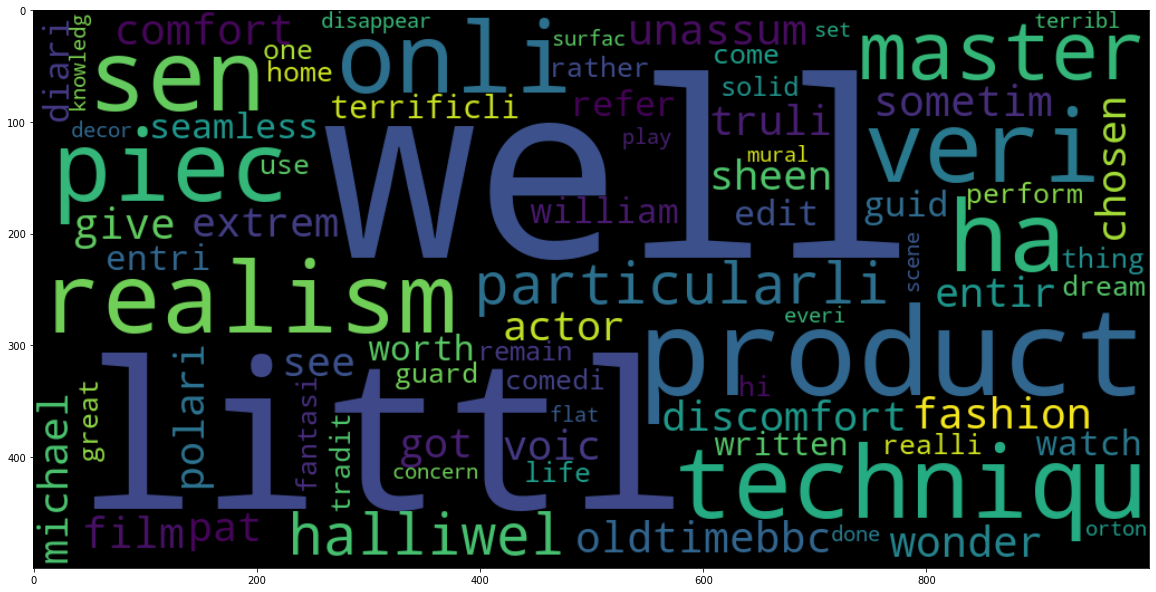

In [24]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(20,20))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=700,min_font_size=7)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

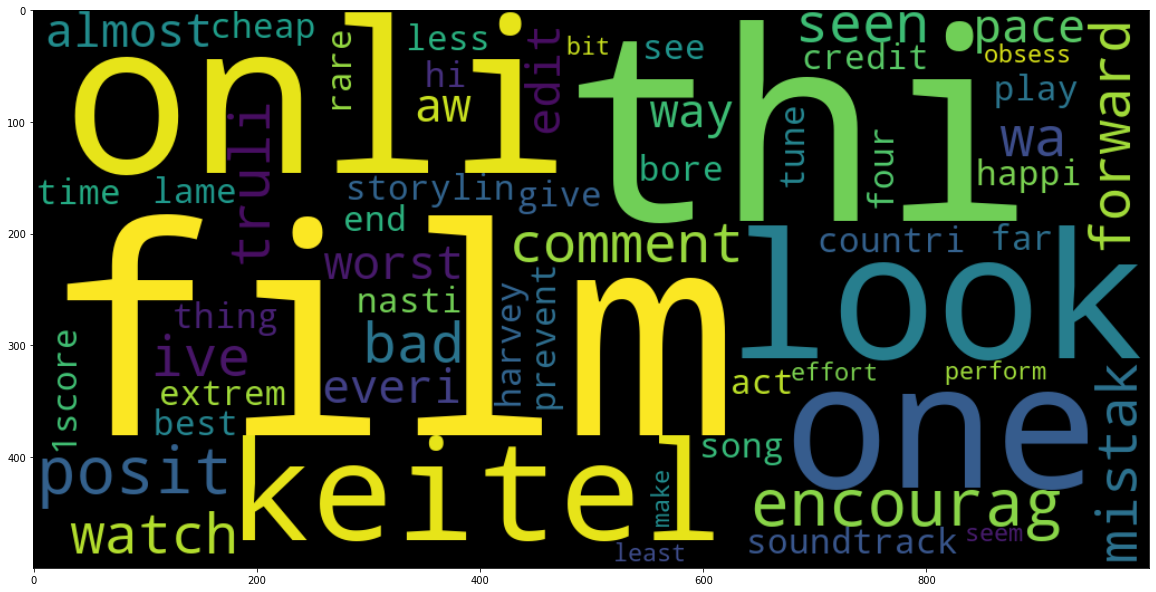

In [25]:
plt.figure(figsize=(20,20))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=700,min_font_size=7)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
lr_bow_n=classifier.fit(cv_train_reviews,train_sentiments)
print(lr_bow_n)
#Fitting the model for tfidf features
lr_tfidf_n=classifier.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf_n)

In [27]:
vocab_Size=10000
embeeding_dim=16
max_length=120
trunk_type='post'
oov_tok='<OOV>'
num_epoch=10

In [35]:
import numpy as np
train_sentiments=np.array(train_sentiments)
test_sentiments=np.array(test_sentiments)


In [38]:
tokenizer=Tokenizer(num_words=vocab_Size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_reviews)
word_index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(train_reviews)
padded=pad_sequences(sequences,maxlen=120,truncating=trunk_type)

testing_sequences = tokenizer.texts_to_sequences(test_reviews)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)


In [40]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [41]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

model=tf.keras.Sequential([
         tf.keras.layers.Embedding(vocab_Size,embeeding_dim,input_length=max_length),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Bidirectional(tf.keras.layers.GRU(16)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1,activation='sigmoid')
])

In [43]:
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history=model.fit(padded,train_sentiments,epochs=num_epoch,callbacks=[callbacks],validation_data=(testing_padded, test_))

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'],color='r' ,label='Training Loss')
plt.plot(history.history['val_loss'], color='b',label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='r',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],color='b',label='Validation Accuracy')
plt.legend(loc='upper left')
plt.show()